In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
le= LabelEncoder()
from sklearn.impute import SimpleImputer
import torch
from sklearn.model_selection import train_test_split

In [ ]:
train=pd.read_csv('cicids_18.csv')

In [ ]:
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
train["Label"].unique()

array(['Benign', 'Bot', nan], dtype=object)

In [ ]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())

1429
5129


In [ ]:
train.drop(train.loc[train["Label"] == "Label"].index, inplace=True)

In [ ]:
train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281.0,2.0,1.0,38.0,0.0,38.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,8080,6,02/03/2018 11:12:21,474.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
6555,8080,6,02/03/2018 11:12:22,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
6556,8080,6,02/03/2018 11:12:22,487.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
6557,8080,6,02/03/2018 11:12:22,11398.0,3.0,4.0,326.0,129.0,326.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot


In [ ]:
train["Protocol"].unique()
# Forcing them to be strings
train = train.astype({"Protocol": str})
train["Protocol"].unique()
train = pd.get_dummies(train, columns=['Protocol'], drop_first=True)
train

,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,443,02/03/2018 08:47:38,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,49684,02/03/2018 08:47:38,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,443,02/03/2018 08:47:40,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,443,02/03/2018 08:47:40,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,443,02/03/2018 08:47:41,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,8080,02/03/2018 11:12:21,474.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6555,8080,02/03/2018 11:12:22,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6556,8080,02/03/2018 11:12:22,487.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6557,8080,02/03/2018 11:12:22,11398.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True


In [ ]:
columns_to_drop = [
    'Dst Port',
    'Timestamp',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s'  # This field had np.inf values during training, as such was removed
]

In [ ]:
train.drop(columns=columns_to_drop, inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,474.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6556,487.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6557,11398.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True


In [ ]:
train.dropna(inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,10239.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6554,474.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6556,487.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True


In [ ]:
train.drop_duplicates(inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,10794.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6551,10651.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6553,10239.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,False,True


In [ ]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())

1395
2911


In [ ]:
train.replace(to_replace="Benign", value=0, inplace=True)
train.replace(to_replace="Bot", value=1, inplace=True)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,10794.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6551,10651.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6553,10239.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True


In [ ]:
train.info

<bound method DataFrame.info of       Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0          141385.0           9.0           7.0            553.0   
1             281.0           2.0           1.0             38.0   
2          279824.0          11.0          15.0           1086.0   
3             132.0           2.0           0.0              0.0   
4          274016.0           9.0          13.0           1285.0   
...             ...           ...           ...              ...   
6549        10794.0           3.0           4.0            326.0   
6551        10651.0           3.0           4.0            326.0   
6553        10239.0           3.0           4.0            326.0   
6555        10860.0           3.0           4.0            326.0   
6557        11398.0           3.0           4.0            326.0   

      TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0              3773.0            202.0              0.0         61.444444   
1                 0.0             38.0              0.0         19.000000   
2             10527.0            385.0              0.0         98.727273   
3                 0.0              0.0              0.0          0.000000   
4              6141.0            517.0              0.0        142.777778   
...               ...              ...              ...               ...   
6549            129.0            326.0              0.0        108.666667   
6551            129.0            326.0              0.0        108.666667   
6553            129.0            326.0              0.0        108.666667   
6555            129.0            326.0              0.0        108.666667   
6557            129.0            326.0              0.0        108.666667   

      Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0           87.534438           1460.0  ...         0.0         0.0   
1           26.870058              0.0  ...         0.0         0.0   
2          129.392497           1460.0  ...         0.0         0.0   
3            0.000000              0.0  ...         0.0         0.0   
4          183.887722           1460.0  ...         0.0         0.0   
...               ...              ...  ...         ...         ...   
6549       188.216188            112.0  ...         0.0         0.0   
6551       188.216188            112.0  ...         0.0         0.0   
6553       188.216188            112.0  ...         0.0         0.0   
6555       188.216188            112.0  ...         0.0         0.0   
6557       188.216188            112.0  ...         0.0         0.0   

      Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  Protocol_17  \
0            0.0        0.0       0.0       0.0       0.0      0        False   
1            0.0        0.0       0.0       0.0       0.0      0        False   
2            0.0        0.0       0.0       0.0       0.0      0        False   
3            0.0        0.0       0.0       0.0       0.0      0        False   
4            0.0        0.0       0.0       0.0       0.0      0        False   
...          ...        ...       ...       ...       ...    ...          ...   
6549         0.0        0.0       0.0       0.0       0.0      1        False   
6551         0.0        0.0       0.0       0.0       0.0      1        False   
6553         0.0        0.0       0.0       0.0       0.0      1        False   
6555         0.0        0.0       0.0       0.0       0.0      1        False   
6557         0.0        0.0       0.0       0.0       0.0      1        False   

      Protocol_6  
0           True  
1           True  
2           True  
3           True  
4           True  
...          ...  
6549        True  
6551        True  
6553        True  
6555        True  
6557        True  

[4306 rows x 73 columns]>

In [ ]:

train = pd.DataFrame(train)
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,10794.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6551,10651.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6553,10239.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True


In [ ]:
train.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [ ]:
train["Label"].value_counts()

Label
1    2911
0    1395
Name: count, dtype: int64

<Axes: >

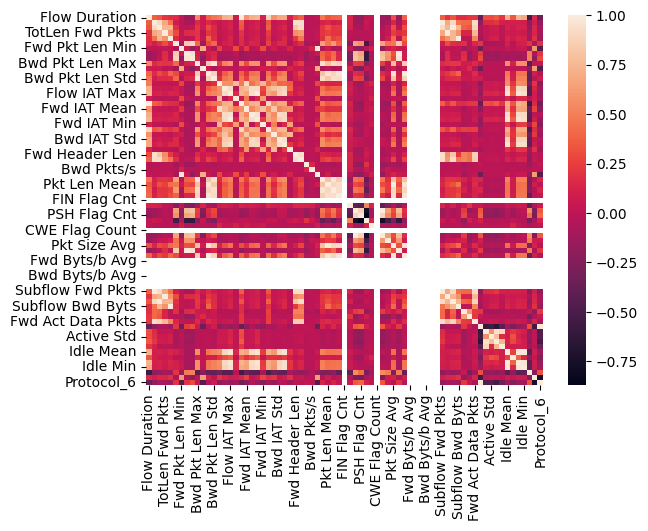

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [ ]:
X = train.drop(["Label"], axis=1)
# X = X[numeric_columns]

y =  train["Label"]

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4306 entries, 0 to 6557
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      4306 non-null   float64
 1   Tot Fwd Pkts       4306 non-null   float64
 2   Tot Bwd Pkts       4306 non-null   float64
 3   TotLen Fwd Pkts    4306 non-null   float64
 4   TotLen Bwd Pkts    4306 non-null   float64
 5   Fwd Pkt Len Max    4306 non-null   float64
 6   Fwd Pkt Len Min    4306 non-null   float64
 7   Fwd Pkt Len Mean   4306 non-null   float64
 8   Fwd Pkt Len Std    4306 non-null   float64
 9   Bwd Pkt Len Max    4306 non-null   float64
 10  Bwd Pkt Len Min    4306 non-null   float64
 11  Bwd Pkt Len Mean   4306 non-null   float64
 12  Bwd Pkt Len Std    4306 non-null   float64
 13  Flow IAT Mean      4306 non-null   float64
 14  Flow IAT Std       4306 non-null   float64
 15  Flow IAT Max       4306 non-null   float64
 16  Flow IAT Min       4306 non-n

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

In [ ]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,10794.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6551,10651.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6553,10239.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
original_columns= train.columns.tolist()
scaler = MinMaxScaler()
train_scaled_values= scaler.fit_transform(train)
train_scaled=pd.DataFrame(train_scaled_values,columns=original_columns)

In [ ]:
train_scaled.columns


Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [ ]:
final_data = train_scaled.groupby('Label').apply(lambda x: x.sample(frac=0.1,random_state=38))
final_data.shape

(431, 73)

In [ ]:
final_data.groupby(level='Label').size()

Label
0.0    140
1.0    291
dtype: int64

In [ ]:
final_data

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                    
0.0   21         0.533602      0.000787      0.001732         0.000829   
      420        0.995944      0.037795      0.000000         0.000000   
      575        0.461860      0.004724      0.005195         0.000052   
      624        0.002170      0.001575      0.000866         0.000000   
      1726       0.875922      0.005512      0.008658         0.002868   
...                   ...           ...           ...              ...   
1.0   3864       0.000089      0.001575      0.003463         0.002816   
      2014       0.000092      0.001575      0.003463         0.002816   
      3387       0.000085      0.001575      0.003463         0.002816   
      1528       0.000089      0.001575      0.003463         0.002816   
      1768       0.000088      0.001575      0.003463         0.002816   

            TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                           
0.0   21           0.000089         0.028302         0.152381   
      420          0.000000         0.000000         0.000000   
      575          0.000000         0.000590         0.000000   
      624          0.000000         0.000000         0.000000   
      1726         0.000494         0.076651         0.038095   
...                     ...              ...              ...   
1.0   3864         0.000119         0.192217         0.000000   
      2014         0.000119         0.192217         0.000000   
      3387         0.000119         0.192217         0.000000   
      1528         0.000119         0.192217         0.000000   
      1768         0.000119         0.192217         0.000000   

            Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                           ...   
0.0   21            0.119384         0.000000         0.032877  ...   
      420           0.000000         0.000000         0.000000  ...   
      575           0.002132         0.000591         0.000000  ...   
      624           0.000000         0.000000         0.000000  ...   
      1726          0.103218         0.085398         0.150685  ...   
...                      ...              ...              ...  ...   
1.0   3864          0.270273         0.294256         0.076712  ...   
      2014          0.270273         0.294256         0.076712  ...   
      3387          0.270273         0.294256         0.076712  ...   
      1528          0.270273         0.294256         0.076712  ...   
      1768          0.270273         0.294256         0.076712  ...   

            Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  \
Label                                                                           
0.0   21      0.000000    0.000220    0.000222   0.537815  0.000000  0.537815   
      420     0.087846    0.128797    0.012240   0.126050  0.190561  0.189076   
      575     0.000002    0.000391    0.000391   0.084034  0.000002  0.084034   
      624     0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      1726    0.000779    0.001940    0.000671   0.125210  0.002365  0.126050   
...                ...         ...         ...        ...       ...       ...   
1.0   3864    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      2014    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      3387    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      1528    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      1768    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   

            Idle Min  Label  Protocol_17  Protocol_6  
Label                                                 
0.0   21    0.537815    0.0          1.0         0.0  
      420   0.062370    0.0          0.0         0.0  
     

In [ ]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,10794.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6551,10651.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6553,10239.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
6555,10860.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True


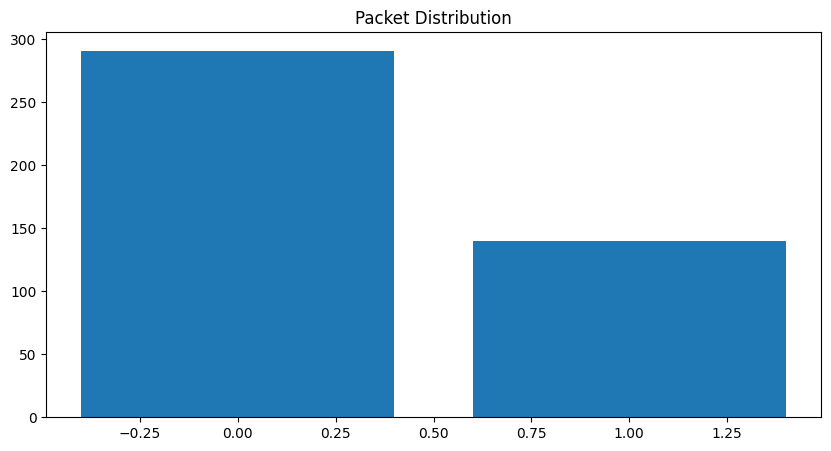

In [ ]:
import matplotlib.pyplot as plt
def visualizeBar(final_data):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=final_data['Label'].unique(), height=final_data['Label'].value_counts())
    p = plt.gcf()
#%%time
# network_data = dropInfinateNull(network_data)
visualizeBar(final_data)

In [ ]:
final_data.head

<bound method NDFrame.head of             Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                    
0.0   21         0.533602      0.000787      0.001732         0.000829   
      420        0.995944      0.037795      0.000000         0.000000   
      575        0.461860      0.004724      0.005195         0.000052   
      624        0.002170      0.001575      0.000866         0.000000   
      1726       0.875922      0.005512      0.008658         0.002868   
...                   ...           ...           ...              ...   
1.0   3864       0.000089      0.001575      0.003463         0.002816   
      2014       0.000092      0.001575      0.003463         0.002816   
      3387       0.000085      0.001575      0.003463         0.002816   
      1528       0.000089      0.001575      0.003463         0.002816   
      1768       0.000088      0.001575      0.003463         0.002816   

            TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                           
0.0   21           0.000089         0.028302         0.152381   
      420          0.000000         0.000000         0.000000   
      575          0.000000         0.000590         0.000000   
      624          0.000000         0.000000         0.000000   
      1726         0.000494         0.076651         0.038095   
...                     ...              ...              ...   
1.0   3864         0.000119         0.192217         0.000000   
      2014         0.000119         0.192217         0.000000   
      3387         0.000119         0.192217         0.000000   
      1528         0.000119         0.192217         0.000000   
      1768         0.000119         0.192217         0.000000   

            Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                           ...   
0.0   21            0.119384         0.000000         0.032877  ...   
      420           0.000000         0.000000         0.000000  ...   
      575           0.002132         0.000591         0.000000  ...   
      624           0.000000         0.000000         0.000000  ...   
      1726          0.103218         0.085398         0.150685  ...   
...                      ...              ...              ...  ...   
1.0   3864          0.270273         0.294256         0.076712  ...   
      2014          0.270273         0.294256         0.076712  ...   
      3387          0.270273         0.294256         0.076712  ...   
      1528          0.270273         0.294256         0.076712  ...   
      1768          0.270273         0.294256         0.076712  ...   

            Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  \
Label                                                                           
0.0   21      0.000000    0.000220    0.000222   0.537815  0.000000  0.537815   
      420     0.087846    0.128797    0.012240   0.126050  0.190561  0.189076   
      575     0.000002    0.000391    0.000391   0.084034  0.000002  0.084034   
      624     0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      1726    0.000779    0.001940    0.000671   0.125210  0.002365  0.126050   
...                ...         ...         ...        ...       ...       ...   
1.0   3864    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      2014    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      3387    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      1528    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   
      1768    0.000000    0.000000    0.000000   0.000000  0.000000  0.000000   

            Idle Min  Label  Protocol_17  Protocol_6  
Label                                                 
0.0   21    0.537815    0.0          1.0         0.0  
      420   0.0623

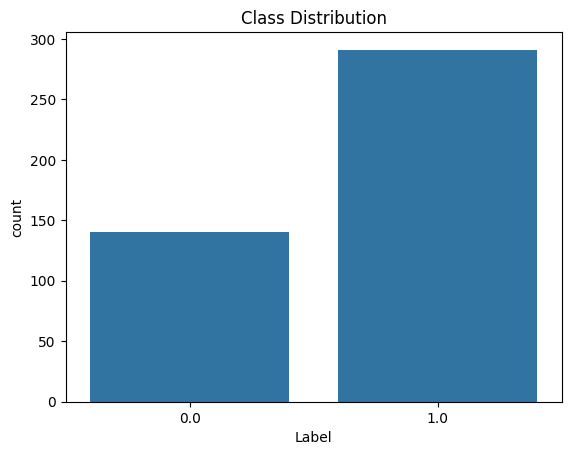

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label',data=final_data)
plt.title('Class Distribution')
plt.show()



In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=bfdc9c4a8b8b3c606cdde863185d724cd290bd87443cbc3e1b0d99b7529c575c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=38)

# Fit the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=38)

In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

# Define class names
class_name_str = ['Benign', 'Bot']

# Instantiate the LIME explainer
svm_explainer = lime_tabular.LimeTabularExplainer(X_train,
                                                  feature_names=original_columns,
                                                  class_names=class_name_str,
                                                  mode='classification')

# Select a single instance from X_test for explanation (you can change this as needed)
instance_idx = 0
instance = X_test[instance_idx]

# Explain the prediction for the selected instance using SVM classifier
svm_explanation = svm_explainer.explain_instance(instance,
                                                  svm_classifier.predict_proba,
                                                  num_features=len(original_columns))

# Print LIME explanation
svm_explanation.show_in_notebook()


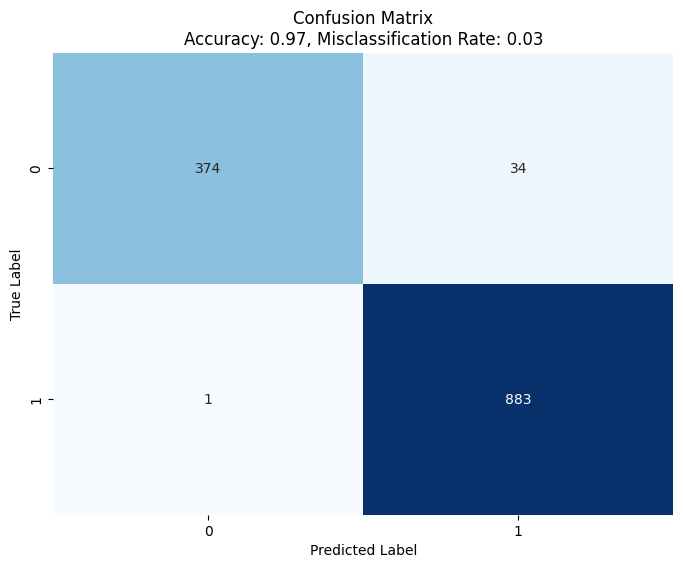

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for test set
y_pred = svm_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)

# Calculate misclassification rate
misclassification_rate = 1 - accuracy

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix\nAccuracy: {:.2f}, Misclassification Rate: {:.2f}".format(accuracy, misclassification_rate))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



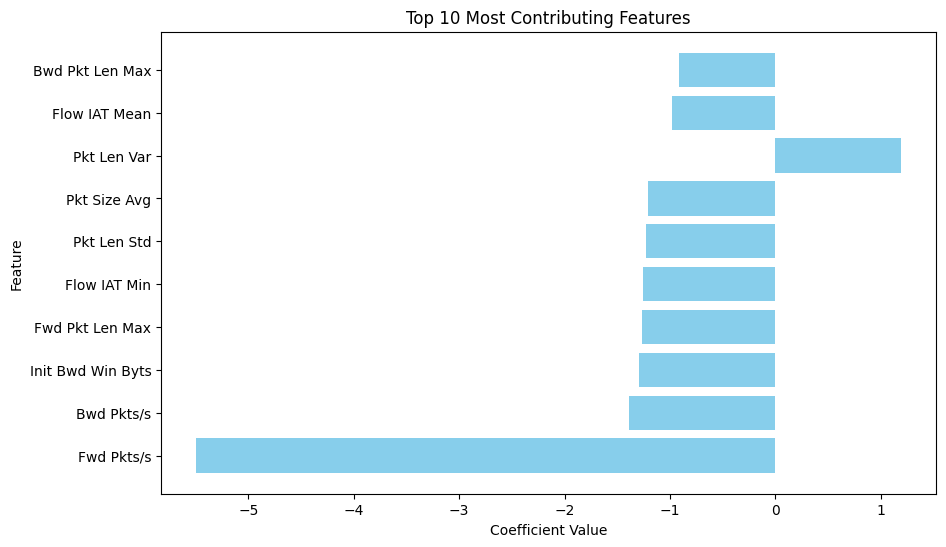

In [ ]:
# Get the indices of the top 10 features
top10_indices = np.argsort(np.abs(svm_classifier.coef_[0]))[-10:]

# Get the names of the top 10 most contributing features
top10_features = [original_columns[i] for i in top10_indices]

# Get the coefficients of the top 10 features
top10_coefficients = svm_classifier.coef_[0][top10_indices]

# Plot the feature contribution graph
plt.figure(figsize=(10, 6))
plt.barh(top10_features, top10_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Most Contributing Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient on top
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular

# Assuming you have already defined your SVM classifier as svm_classifier
# and original_columns contains the names of your features
# Also, X contains your feature data and y contains your target labels

# Get the indices of the top 10 features
top10_indices = np.argsort(np.abs(svm_classifier.coef_[0]))[-10:]

# Get the names of the top 10 most contributing features
top10_features = [original_columns[i] for i in top10_indices]

# Prepare training data for LIME explainer (assuming X contains feature data)
training_data = X

# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(training_data, mode="classification", feature_names=original_columns)

# Select instances for explanation (you can choose any instance from your dataset)
instances = [X[i] for i in range(5)]  # Assuming X contains your feature data

# Generate explanations for each instance
for instance in instances:
    exp = explainer.explain_instance(instance, svm_classifier.predict_proba)
    exp.show_in_notebook()  # Display explanation in Jupyter notebook
